In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [3]:
# Example text corpus
data = """Deep learning is a subset of machine learning.
Machine learning is a subset of artificial intelligence.
Deep learning uses neural networks for complex pattern recognition.
GRU is a type of recurrent neural network.
Recurrent neural networks are used for sequence prediction tasks.
"""

# Convert to lowercase and split sentences
corpus = data.lower().split("\n")
corpus = [line for line in corpus if line.strip() != '']
corpus


['deep learning is a subset of machine learning.',
 'machine learning is a subset of artificial intelligence.',
 'deep learning uses neural networks for complex pattern recognition.',
 'gru is a type of recurrent neural network.',
 'recurrent neural networks are used for sequence prediction tasks.']

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print("Total unique words:", total_words)
print(tokenizer.word_index)


Total unique words: 26
{'learning': 1, 'is': 2, 'a': 3, 'of': 4, 'neural': 5, 'deep': 6, 'subset': 7, 'machine': 8, 'networks': 9, 'for': 10, 'recurrent': 11, 'artificial': 12, 'intelligence': 13, 'uses': 14, 'complex': 15, 'pattern': 16, 'recognition': 17, 'gru': 18, 'type': 19, 'network': 20, 'are': 21, 'used': 22, 'sequence': 23, 'prediction': 24, 'tasks': 25}


In [5]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

print("Total sequences:", len(input_sequences))


Total sequences: 37


In [6]:
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("Max sequence length:", max_seq_len)
print("X shape:", X.shape)
print("y shape:", y.shape)


Max sequence length: 9
X shape: (37, 8)
y shape: (37, 26)


In [7]:
model = Sequential([
    Embedding(total_words, 64, input_length=max_seq_len-1),
    GRU(128, return_sequences=False),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.0541 - loss: 3.2611
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1622 - loss: 3.2443 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2162 - loss: 3.2311
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.1081 - loss: 3.2174
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1081 - loss: 3.2026
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1081 - loss: 3.1871
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1081 - loss: 3.1673
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1081 - loss: 3.1456
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1081 - loss: 3.1194
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1081 - loss: 3.0849
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1081 - loss: 3.0446
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0

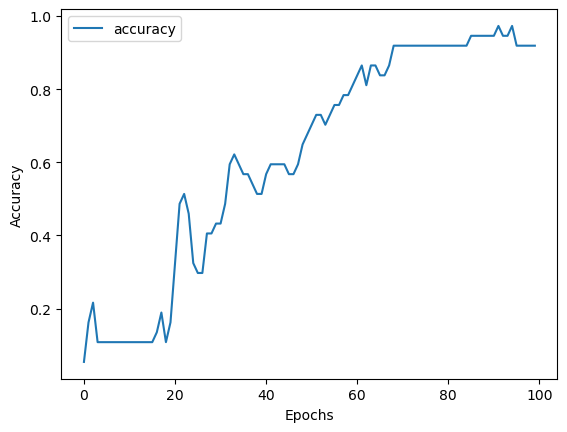

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
def predict_next_word(seed_text, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text


In [11]:
print(predict_next_word("deep learning", next_words=5))
print(predict_next_word("machine learning is", next_words=5))
print(predict_next_word("recurrent neural", next_words=5))


deep learning is a subset of artificial
machine learning is a subset of artificial intelligence
recurrent neural networks are used for sequence


In [12]:
model.save('gru_word_prediction_model.h5')
print("Model saved successfully!")


Model saved successfully!
